In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os

In [ ]:
df=pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
print(df.Fuel_Type.value_counts(),"\n")
print(df.Seller_Type.value_counts(),"\n")
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64 

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64 

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [ ]:
#Fuel_Type ==> 1 = Petrol , 0 = Diesel , 2 = CNG
#Seller_Type ==> 1 = Manual , 0 = Automatic 
#Seller_Type ==> 1 = Dealer , 0 = Individual

df.Fuel_Type.replace(regex={"Petrol":"0","Diesel":"1","CNG":"2"},inplace=True)
df.Seller_Type.replace(regex={"Dealer":"0","Individual":"1"},inplace=True)
df.Transmission.replace(regex={"Manual":"0","Automatic":"1"},inplace=True)
df[["Fuel_Type","Seller_Type","Transmission"]]=df[["Fuel_Type","Seller_Type","Transmission"]].astype(int)

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

[197176, 213000, 500000]


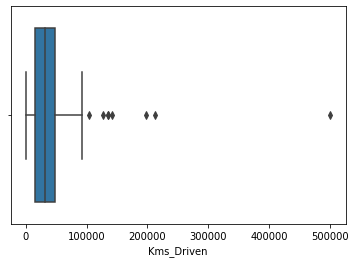

In [ ]:
def show_outliers(col_name) : 
    fig = sns.boxplot(df[col_name]);
    return fig 


def detect_outliers(data) : 
    outliers = []
    threshold = 3 # how many std away --> 3rd std 
    mean = np.mean(data)
    std = np.std(data)
    
    for d in data : 
        z_score = (d-mean)/std
        if np.abs(z_score) > threshold : 
            outliers.append(d)
    
    return outliers 

print(detect_outliers(df['Kms_Driven']))

show_outliers('Kms_Driven')

In [ ]:
df.shape

(301, 9)

In [ ]:
def remove_outliers(df, col_name) :
    to_drop = []
    for i in range(len(df)) : 
        if df[col_name].loc[i] in detect_outliers(df[col_name]) : 
            to_drop.append(i)

    return to_drop 

index_to_drop = []
index_to_drop.append(remove_outliers(df, 'Kms_Driven'))
index_to_drop

[[84, 179, 196]]

[23.0, 19.99, 23.5, 33.0, 23.0, 35.0, 23.0, 20.75]


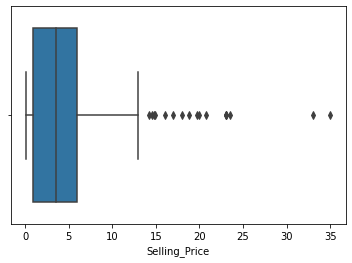

In [ ]:
print(detect_outliers(df['Selling_Price']))

show_outliers('Selling_Price')

In [ ]:
# index_to_drop.append(remove_outliers(df, 'Selling_Price'))
for val in index_to_drop : 
    for i in range(len(val)) : 
        df.drop(index = val[i], inplace = True)

df.shape

(290, 9)

In [ ]:
print(df.Year.unique())
print(min(df.Year.unique()))
print(max(df.Year.unique()))

[2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]
2003
2018


In [ ]:
print(df.Owner.unique())

[0 1 3]


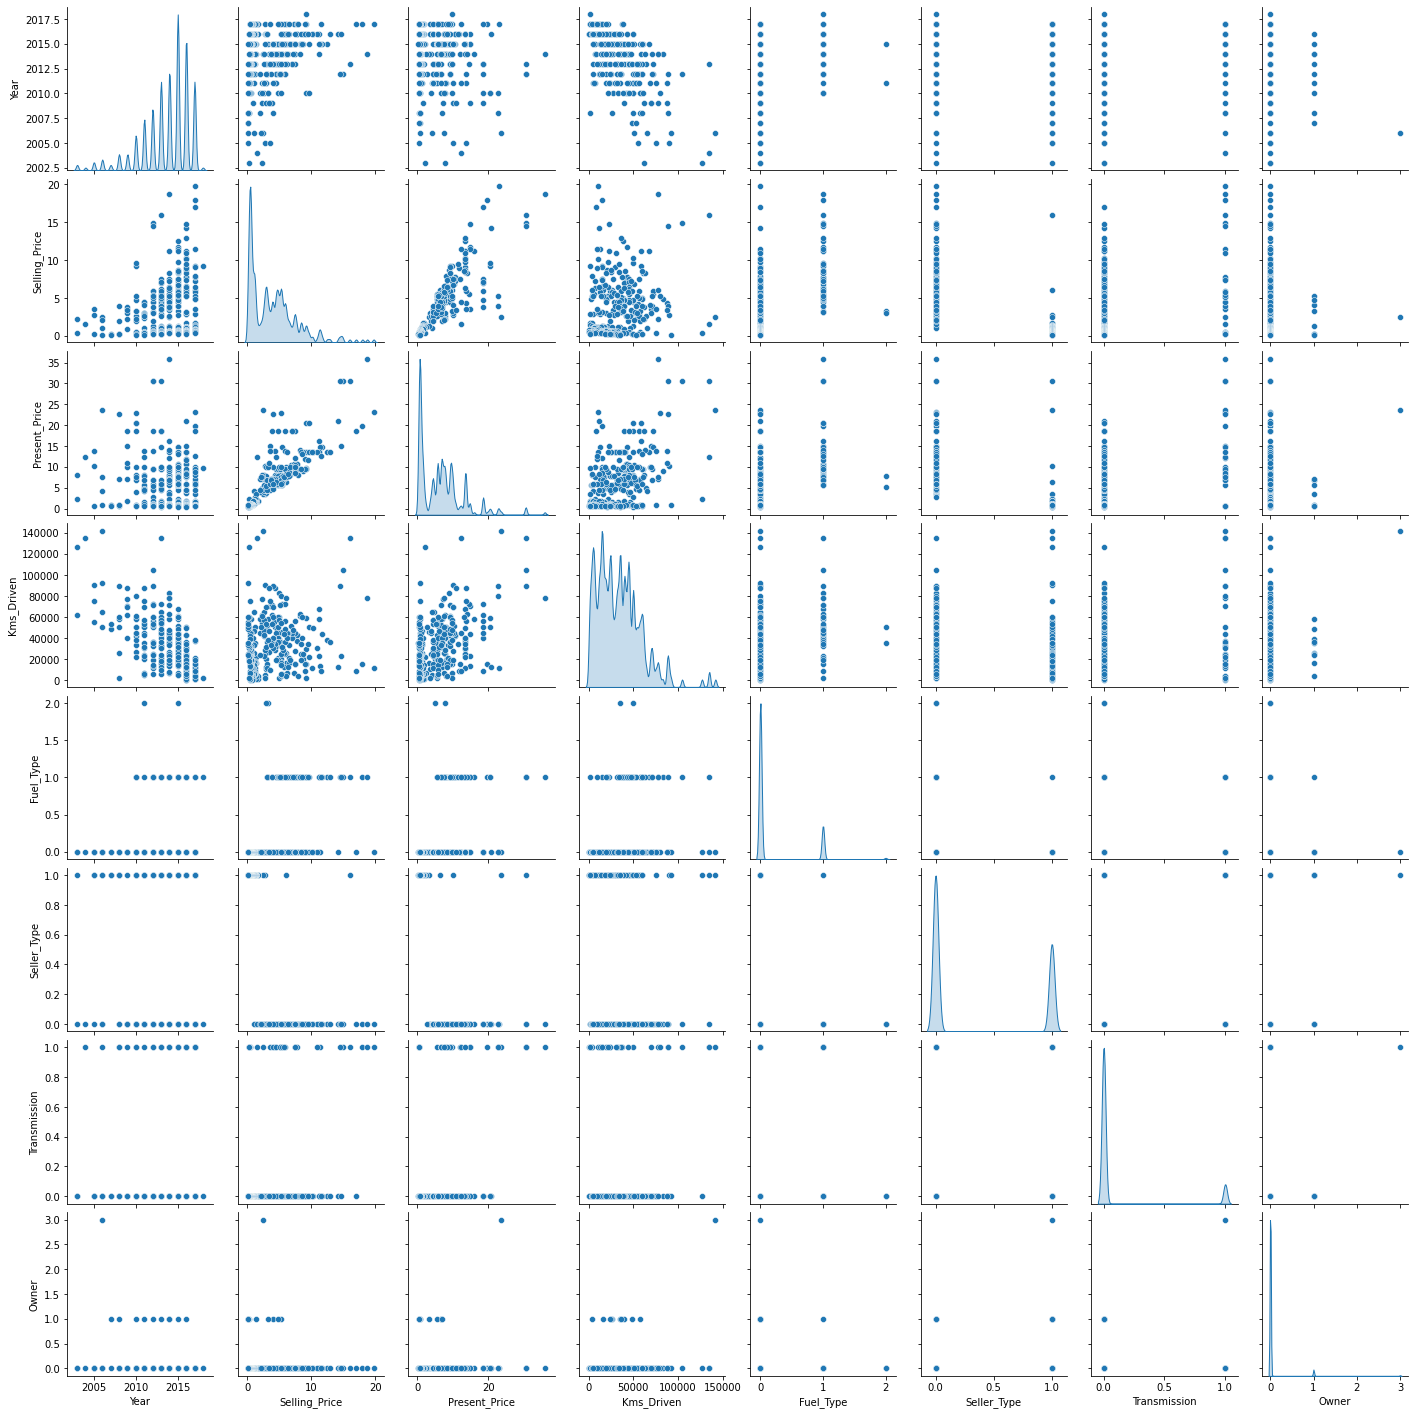

In [ ]:
sns.pairplot(df,diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False))
plt.show()

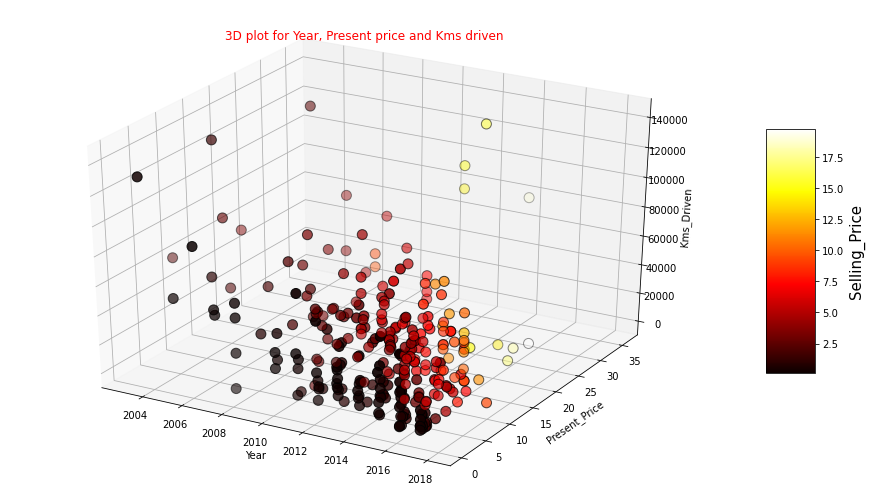

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,9))
ax  = fig.gca(projection = "3d")

plot =  ax.scatter(df["Year"],
           df["Present_Price"],
           df["Kms_Driven"],
           linewidth=1,edgecolor ="k",
           c=df["Selling_Price"],s=100,cmap="hot")

ax.set_xlabel("Year")
ax.set_ylabel("Present_Price")
ax.set_zlabel("Kms_Driven")

lab = fig.colorbar(plot,shrink=.5,aspect=5)
lab.set_label("Selling_Price",fontsize = 15)

plt.title("3D plot for Year, Present price and Kms driven",color="red")
plt.show()

In [ ]:
y=df.Selling_Price
x=df.drop(["Selling_Price","Car_Name"],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (232, 7)
x test:  (58, 7)
y train:  (232,)
y test:  (58,)


In [ ]:
x_train.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,2016,10.79,43000,1,0,0,0
147,2015,0.84,58000,0,1,0,0
183,2013,0.47,21000,0,1,0,0
74,2014,8.93,83000,1,0,0,0
258,2015,13.60,25000,0,0,0,0


In [ ]:
y_train.head()

17     7.75
147    0.55
183    0.27
74     4.90
258    8.40
Name: Selling_Price, dtype: float64